<a href="https://colab.research.google.com/github/Sumit27Bisht/CD-LAB-FILE-1816110213-/blob/main/Skin_Disease_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import cv2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import PIL.Image as Image 
from pathlib import Path

from glob import glob
import pandas as pd
import os


In [3]:
from keras.models import load_model

In [4]:
model = load_model("/content/my_best_model.h5")

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [6]:
IMAGE_SIZE = (224, 224)

In [9]:
image_labels = []
with open("/content/skin diseases.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels

["1. Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)",
 '2. basal cell carcinoma (bcc)',
 '3. benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl)',
 '4. dermatofibroma (df)',
 '5. melanoma (mel)',
 '6. melanocytic nevi (nv) ',
 '7. vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).']

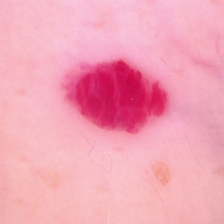

In [23]:
disease = Image.open("/content/ISIC_0024706.jpg").resize(IMAGE_SIZE)
disease


In [24]:
disease = np.array(disease)/255.0
disease.shape

(224, 224, 3)

In [25]:
disease[np.newaxis, ...]

array([[[[0.97254902, 0.71372549, 0.78431373],
         [0.96862745, 0.70980392, 0.77647059],
         [0.97254902, 0.70588235, 0.78039216],
         ...,
         [0.97254902, 0.68627451, 0.76470588],
         [0.96862745, 0.68235294, 0.76470588],
         [0.96862745, 0.69019608, 0.76470588]],

        [[0.96862745, 0.70980392, 0.78431373],
         [0.97254902, 0.70588235, 0.79607843],
         [0.97254902, 0.70588235, 0.78823529],
         ...,
         [0.96862745, 0.67843137, 0.75686275],
         [0.96862745, 0.68627451, 0.77254902],
         [0.96862745, 0.69411765, 0.76470588]],

        [[0.97254902, 0.70980392, 0.77647059],
         [0.97254902, 0.72156863, 0.8       ],
         [0.97254902, 0.71372549, 0.79607843],
         ...,
         [0.96470588, 0.67058824, 0.74901961],
         [0.96862745, 0.68627451, 0.76470588],
         [0.96862745, 0.68235294, 0.75294118]],

        ...,

        [[0.95294118, 0.69803922, 0.70588235],
         [0.94509804, 0.69019608, 0.69019608]

In [26]:
result = model.predict(disease[np.newaxis, ...])
result.shape

(1, 7)

In [27]:
predicted_label_index = np.argmax(result)
predicted_label_index

6

In [28]:
image_labels[predicted_label_index]

'7. vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).'